In [21]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np

In [22]:
def faceDetected(image_path,threshold_confidence=0.5,visualize=True):
    #threshold_confidence=0.5
    model_file="deep-learning-face-detection/deep-learning-face-detection/res10_300x300_ssd_iter_140000.caffemodel"
    prototct_file="deep-learning-face-detection/deep-learning-face-detection/deploy.prototxt.txt"
    face_detected=False
    face_coordinates=[]

    image=cv2.imread(image_path)
    (h, w) = image.shape[:2]
    
    if(visualize):
        fig = plt.figure()
        plt.figure(figsize=(20,10)) 
        plt.subplot(3, 1, 1)
        plt.title("Original Image")
        plt.imshow(image)

    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))

    net = cv2.dnn.readNetFromCaffe(prototct_file,model_file)
    net.setInput(blob)
    detections = net.forward()
    face_count=0
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        #print("{}The confidence is P{} and the threshold confidence is{}".format(image_path,confidence,threshold_confidence))
        if confidence > threshold_confidence:
           # print("Inside the detection",image_path)
            face_detected=True
            face_count=face_count+1
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            face_coordinates.append([startX,startY,endX,endY])

            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)
    
    
    
    #print("Face detected for ",image_path,face_detected,face_count)
    if(visualize):
        plt.subplot(3,1,2)
        plt.title("Face detected")
        plt.imshow(image)
    
    return face_coordinates,face_detected

In [23]:
def updateCoordinates(image,coordinates):
    h,w=image.shape[:2]
    startX=coordinates[0]
    startY=coordinates[1]
    endX=coordinates[2]
    endY=coordinates[3]
    if(startX-25>=0):
        startX=startX-25
    else:
        startX=0
    
    if(endX+25<=w):
        endX=endX+25
    else:
        endX=w
    
    
    if(startY-25>=0):
        startY=startY-25
    
    else:
        startY=0
    
    if(endY+35<=h):
        endY=endY+35
    
    else:
        endY=0
    
    return startX,endX,startY,endY

    
    
    
    

In [24]:
def updateImageDimensions(all_images,height,width):
    dim=(width,height)
    updated_images=[]
    for image in all_images:
        print(image.shape)
        resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        updated_images.append(resized)
    return updated_images
        
        
        

In [25]:
def concatenateImages(updated_images):
    if(len(updated_images)>=2):
        image_concatenated=updated_images[0]
        for image in updated_images[1:]:
            image_concatenated = np.concatenate((image_concatenated, image), axis=1)
    
        return image_concatenated
    else:
        
        pass
            

In [26]:
def Sort(sub_li): 
    return(sorted(sub_li, key = lambda x: x[0]))   

In [27]:
files=list(os.listdir('autoencoder-image-clustering\\ideology_image_dataset'))
filepaths=[os.path.join('autoencoder-image-clustering\\ideology_image_dataset',file) for file in files]
len(filepaths)

2942

(152, 116, 3)
(157, 131, 3)
(146, 111, 3)


<Figure size 432x288 with 0 Axes>

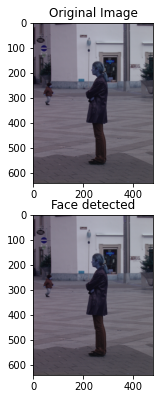

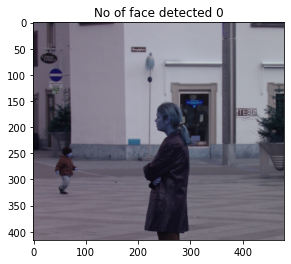

<Figure size 432x288 with 0 Axes>

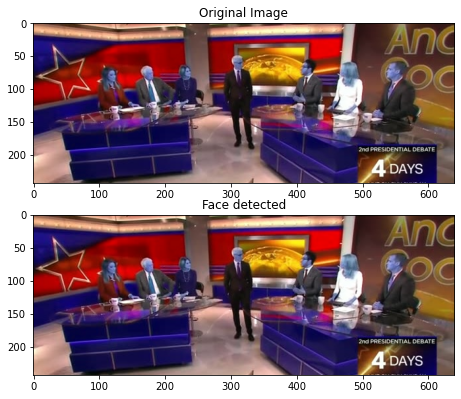

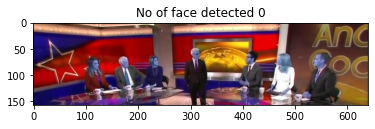

<Figure size 432x288 with 0 Axes>

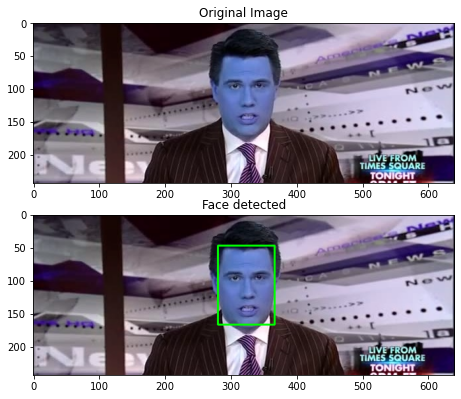

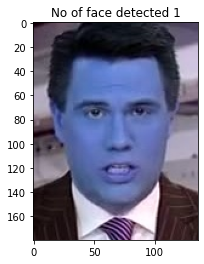

<Figure size 432x288 with 0 Axes>

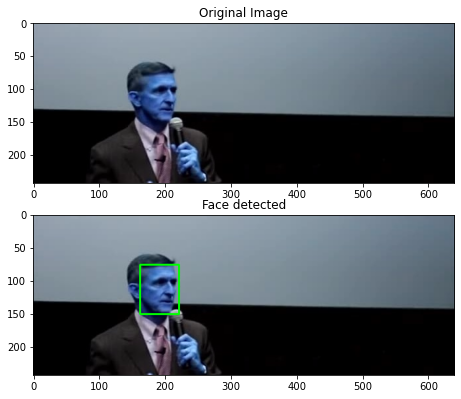

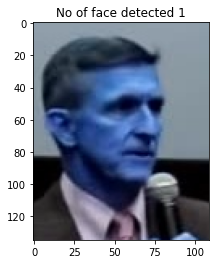

<Figure size 432x288 with 0 Axes>

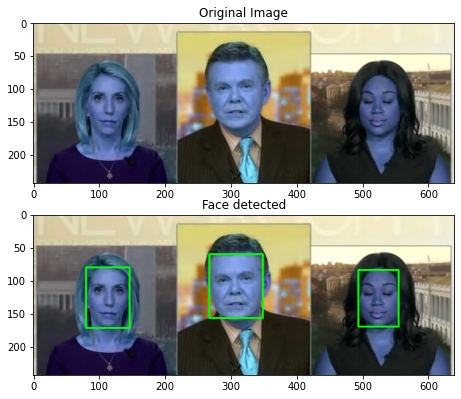

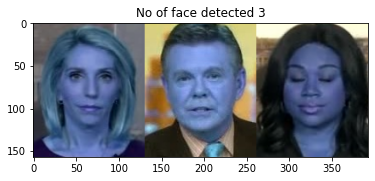

<Figure size 432x288 with 0 Axes>

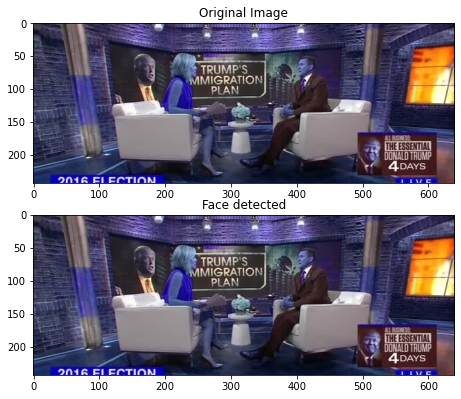

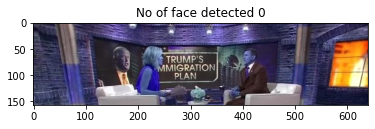

In [30]:
filepaths=['person_010.bmp','clip_584.jpg','clip_1.jpg','clip_6.jpg','clip_43.jpg','clip_826.jpg']
#filepaths=["autoencoder-image-clustering\\ideology_image_dataset\\clip_1739.jpg"]
for imagePath in filepaths:
    face_coordinates,face_detected=faceDetected(imagePath,0.7,True)
    image=cv2.imread(imagePath)
    face_coordinates=Sort(face_coordinates)
    #print(image.shape)
    #filename=os.path.join("ideology_face_dataset",imagePath.split("\\")[2])
    #print(imagePath,filename)
    
    fig = plt.figure()
   # plt.figure(figsize=(10,10)) 
    if(face_detected):
        no_face_detected=len(face_coordinates)
        if(len(face_coordinates)>=2):
            all_images=[]
            max_w=0
            max_h=0
            for face_coordinate in face_coordinates:
                startX,endX,startY,endY=updateCoordinates(image,face_coordinate)
                #print(startX,endX,startY,endY)
                if(startX>=0 and startY>=0 and endX>=0 and endY>=0):
                    new_image=image[startY:endY,startX:endX]
                   
                    h,w=new_image.shape[:2]
                    if(h>0 and w>0):
                        all_images.append(new_image)
                        max_w=max(max_w,w)
                        max_h=max(max_h,h)


            #print(max_w,max_h)
            updated_images=updateImageDimensions(all_images,max_h,max_w)
            #print(updated_images[0].shape,updated_images[1].shape)
            image_concatenated=concatenateImages(updated_images)
            #print(image_concatenated.shape)
            plt.title("No of face detected %i"%no_face_detected)

            plt.imshow(image_concatenated)
            
           # try:
           #     cv2.imwrite(filename,image_concatenated)
            
           # except:
           #     cv2.imwrite(filename,image)
            #    pass
        else:
            startX,endX,startY,endY=updateCoordinates(image,face_coordinates[0])
            if(startX>=0 and startY>=0 and endX>=0 and endY>=0):
                new_image=image[startY:endY,startX:endX]
            
            plt.title("No of face detected %i"%no_face_detected)
            plt.imshow(new_image)
           # try:
           #     cv2.imwrite(filename,new_image)
            
           # except:
           #     cv2.imwrite(filename,image)
           #     pass
    else:
        no_face_detected=0
        plt.title("No of face detected %i"%no_face_detected)
        h,w=image.shape[0:2]
        x=0
        y=0
        h=h*0.65
        h=int(h)
        image=image[y: y+h, x: x+w] 
        
        plt.imshow(image)
        #cv2.imwrite(filename,image)




